In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [31]:
# Acquire, load, and preview the data.
data = pd.read_csv('Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
data_cut = data.loc[:,:]

In [15]:
Y2 = data_cut['Sales'].values.reshape(-1, 1)
X2 = data_cut[['TV','Radio','Newspaper']]
regr.fit(X2, Y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

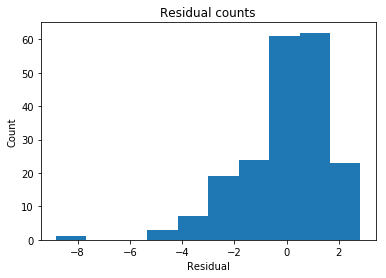

In [7]:
predicted_new = regr.predict(X2).ravel()
actual_new = data_cut['Sales']

# Calculate the error, also called the residual.
residual_new = actual_new - predicted_new

# This looks a bit concerning.
plt.hist(residual_new)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

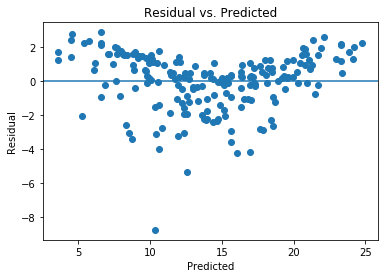

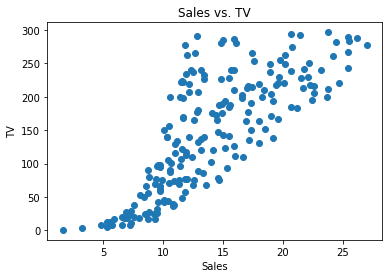

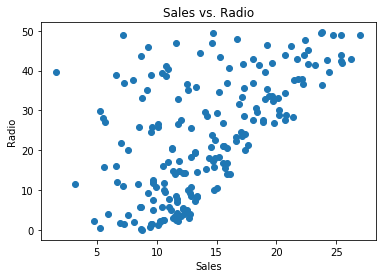

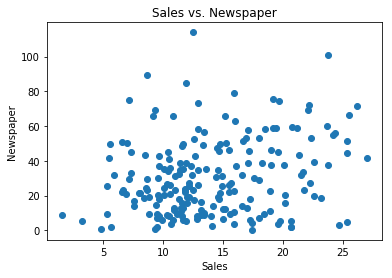

In [9]:
plt.figure


plt.scatter(data_cut['Sales'], data_cut['TV'])
plt.xlabel('Sales')
plt.ylabel('TV')
plt.title('Sales vs. TV')
plt.show()

plt.scatter(data_cut['Sales'], data_cut['Radio'])
plt.xlabel('Sales')
plt.ylabel('Radio')
plt.title('Sales vs. Radio')
plt.show()

plt.scatter(data_cut['Sales'], data_cut['Newspaper'])
plt.xlabel('Sales')
plt.ylabel('Newspaper')
plt.title('Sales vs. Newspaper')
plt.show()

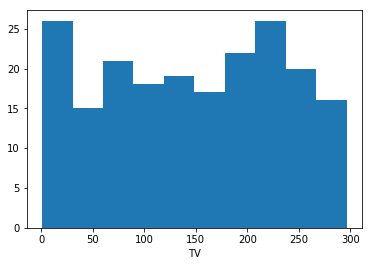

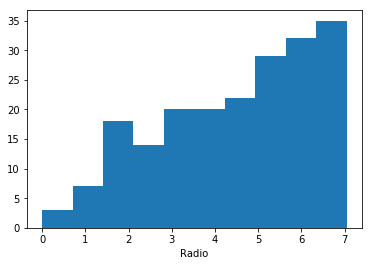

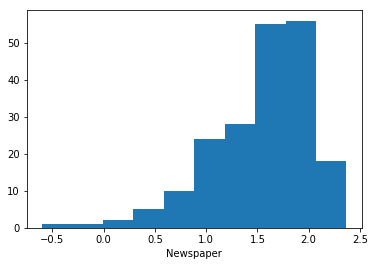

In [44]:
plt.hist((data_cut['TV']))
plt.xlabel('TV')
plt.show()

plt.hist(np.sqrt(data_cut['Radio']))
plt.xlabel('Radio')
plt.show()

plt.hist(np.log(data_cut['Newspaper']))
plt.xlabel('Newspaper')
plt.show()

In [66]:
data = pd.read_csv('Advertising.csv')
data_cut = data

In [67]:
data_cut['Newspaper_log'] = np.log10(data['Newspaper'])

#plt.hist(newspaper_sq)
#plt.xlabel('Newspaper')
#plt.show()
#print(newspaper_sq)


In [51]:
data_cut['Newspaper'] = newspaper_delta

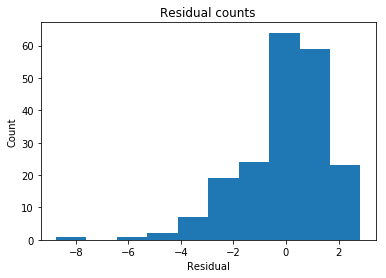

In [52]:
Y2 = data_cut['Sales'].values.reshape(-1, 1)
X2 = data_cut[['TV','Radio','Newspaper']]
regr.fit(X2, Y2)

predicted_new = regr.predict(X2).ravel()
actual_new = data_cut['Sales']

# Calculate the error, also called the residual.
residual_new = actual_new - predicted_new

# This looks a bit concerning.
plt.hist(residual_new)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

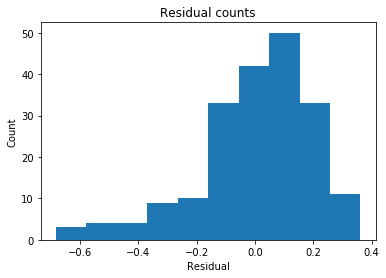

In [85]:
Y = (np.sqrt(data_cut['Sales'])).values.reshape(-1, 1)
X = data_cut[['TV','Radio','Newspaper', 'Radio_low', 'Radio_high', 
              'TV_low','TV_high', 'Newspaper_log']]
regr.fit(X, Y)

predicted = regr.predict(X).ravel()
actual = np.sqrt(data_cut['Sales'])

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

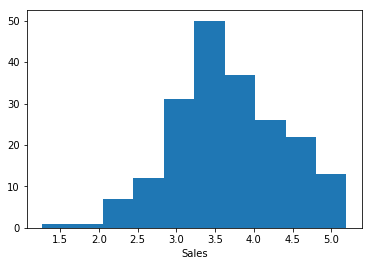

In [77]:
plt.hist(np.sqrt((data_cut['Sales'])))
plt.xlabel('Sales')
plt.show()

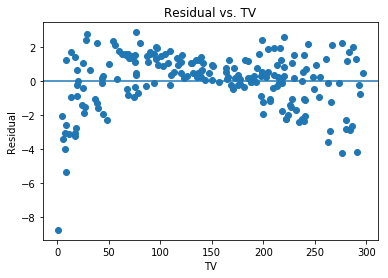

In [70]:
plt.scatter(data['TV'], residual_new)
plt.xlabel('TV')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. TV')
plt.show()

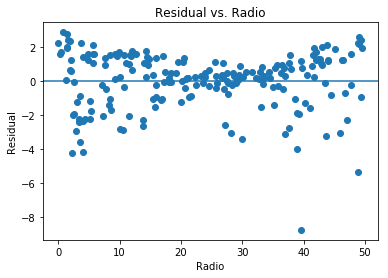

In [57]:
plt.scatter(data['Radio'], residual_new)
plt.xlabel('Radio')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Radio')
plt.show()

In [68]:
data_cut['TV_low'] = (data_cut['TV'] <= 100).astype(int)
data_cut['TV_high'] = (data_cut['TV'] >= 200).astype(int)
data_cut['Radio_low'] = (data_cut['Radio'] <= 15).astype(int)
data_cut['Radio_high'] = (data_cut['Radio'] <= 35).astype(int)

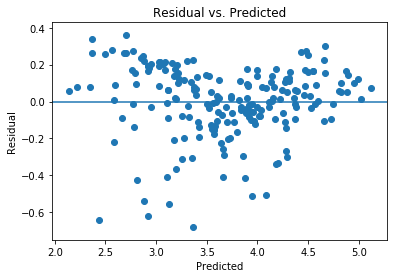

In [86]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [80]:
np.argmin(residual)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


130

In [82]:
data_cut.iloc[130,:]

Unnamed: 0      131.000
TV                0.700
Radio            39.600
Newspaper         8.700
Sales             1.600
Newspaper_log     0.940
TV_low            1.000
TV_high           0.000
Radio_low         0.000
Radio_high        0.000
Name: 130, dtype: float64

In [84]:
data_cut = data_cut.drop(index=130)